In [1]:
import math
import numpy as np
from matplotlib import pyplot
import scipy.optimize as opt

Logistic regression is a statistical model widely used in Machine Learning to predict outcome that can be classified into well defined groups.
For instance: pass/fail, healhy/sick, win/lose etc. It can be also used to classify events - for example, determine whether the image contains specific object (i.e. dog).

Because it makes more sense to have a function (model) which values are between 0 and 1, sigmoid function is used as a basic model for prediction outcome.

\begin{align}
g(z) = \dfrac{1}{1 + e^{-z}}
\end{align}

Drawing a sigmoid function in Python is easy:

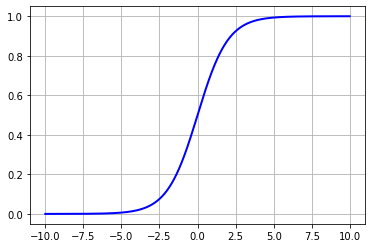

In [2]:
rand_z = np.arange(-10., 10., 0.01)
g = lambda z: 1 / (1 + math.e ** (-z))
calc_g = [g(z) for z in rand_z]

pyplot.plot(rand_z, calc_g, color='b', lw=2)
pyplot.gca().grid()

In the simplest form, everything above value 0.5 is considered to fit the model.
Let's import data from CSV file - it was provided as part of a great Andrew Ng's course on coursera. It contains three columns:
- Column 1: Result (in %) from first exam
- Column 2: Result (in %) from second exam
- Column 3: 1 (Accepted) or 0 (Rejected) - indicator whether student got admitted into Uni (based on exam results)


In [3]:
student_results = np.genfromtxt('exams_results.csv', delimiter=',')
X = student_results[:, [0,1]] # <-- Dataset
X = np.concatenate((np.ones((100, 1)), X), axis = 1) # <-- Dataset with 1 added as a first X value
y = student_results[:, [2]] # <-- Actual outcome

Plotting this dataset might be a bit trickier as we need two separate indicators - one for students that got admitted into university and the other ones that were not.

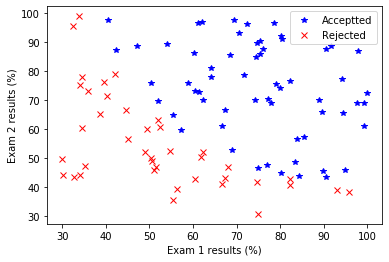

In [52]:
def plot_dataset():
    positive_X = student_results[student_results[:, -1] == 1][:, [0, 1]]
    negative_X = student_results[student_results[:, -1] == 0][:, [0, 1]]
    positive_X_exam_1 = positive_X[:,[0]]
    positive_X_exam_2 = positive_X[:,[1]]
    negative_X_exam_1 = negative_X[:,[0]]
    negative_X_exam_2 = negative_X[:,[1]]
    
    
    pyplot.plot(positive_X_exam_1, positive_X_exam_2, '*b', label='Acceptted')
    pyplot.plot(negative_X_exam_1, negative_X_exam_2, 'xr', label='Rejected')
    pyplot.legend(loc='upper right')
    pyplot.xlabel('Exam 1 results (%)')
    pyplot.ylabel('Exam 2 results (%)')
plot_dataset()

Before we go further, we need to map our features (X) to polynomial features.

In [5]:
def mapPolynomial(x1, x2):
    degrees = 6
    mappedX = np.ones((np.size(x1), 1))

print(mapPolynomial(X[0:,[1]], X[0:,[2]]))

None


Let's now take a look at some mathematics behind logistic regression.

\begin{align}
h = g(X\theta)
\end{align}

We defined $g$ previously - it is a sigmoid function and $\theta$ is a vector o theta values we want to discover.

Vectorized (and regularized) cost function $J$ looks like this:

\begin{align}
J(\theta) = \dfrac{1}{m} \sum\limits_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))] + \dfrac{\lambda}{2m}\sum\limits_{j=1}^{n} \theta_{j}^{2}
\end{align}

Below is Python code for calculating $J(\theta)$

In [6]:
LAMBDA = 1
thetas = np.zeros([np.size(X[0]), 1])
m = np.shape(X)[0]
h0x = g(X.dot(thetas))
J = (1 / m) * np.sum((-y * np.log(h0x)) - (1 - y) * np.log(1 - h0x))# + (LAMBDA / 2 * m) * np.sum(np.power(thetas[1:], 2))

...and for calculating $\theta$ we need to use the following mathematical formula:

\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \dfrac{1}{m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})x_{j}^{(i)} + \dfrac{\lambda}{m} \theta_{j > 1}
\end{align}

Please note that we are just calculating partial derivative of the gradient.

Vectorized formula:

\begin{align}
\theta = \dfrac{1}{m}X^{T}(g(X\theta) - y)+\dfrac{\lambda}{m} \theta_{j > 1}
\end{align}


Actual gradient value will by calculated using 3rd party library (SciPy).

In [7]:
grad = ((1 / m) * X.transpose().dot(h0x - y)) #+ (LAMBDA / m) * thetas)
grad[0:1] = ((1 / m) * X.transpose().dot(h0x - y))[0:1]

Let's combine gradiet and cost calculations into functions:

In [8]:
def calcCost(thetas, X, y, LAMBDA):
    h0x = g(X.dot(thetas))
    return (1 / m) * np.sum((-y * np.log(h0x)) - (1 - y) * np.log(1 - h0x)) #+ (LAMBDA / 2 * m) * np.sum(np.power(thetas[1:], 2))

def calcGradient(thetas, X, y, LAMBDA):
    h0x = g(X.dot(thetas))
    grad = ((1 / m) * X.transpose().dot(h0x - y)) #+ (LAMBDA / m) * thetas)
    grad[0:1] = ((1 / m) * X.transpose().dot(h0x - y))[0:1]
    return grad

gr = calcGradient(np.zeros([np.size(X[0]), 1]), X, y, LAMBDA)

Now, let's minimize function using SciPy library:

In [11]:
thetas = opt.fmin_tnc(func = calcCost, x0 = thetas.flatten(), fprime = calcGradient, args=(X, y.flatten(), LAMBDA))[0]

With calculated thetas we can plot a function.

In [34]:
# degree = 6
# u = np.linspace(-1, 1.5, 50)
# v = np.linspace(-1, 1.5, 50)
# z = np.zeros((len(u), len(v)))

# for i in range(1, len(u)):
#     for j in range(1, len(v)):
#         z[i, j] = map_features(u[i], v[j]) #* thetas

# def map_features(x1, x2):
#     for i in range(1, degree):
#         for j in range(0, i):
#             print(z[:,:-1])
#             z[:,:-1] = (np.power(x1, (i - j)) * np.power(x2, j))
#     return z

ValueError: setting an array element with a sequence.

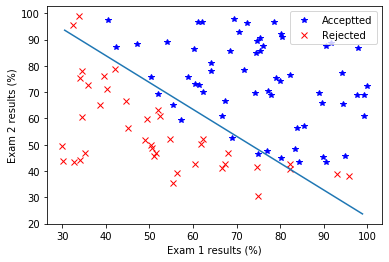

In [65]:
plot_x = np.array([min(X[:,2]), max(X[:,2])])
calc_y = (-1 / thetas[2]) * (thetas[1] * plot_x + thetas[0])
plot_dataset()
pyplot.plot(plot_x, calc_y)